### Лабораторная работа 3

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

np.set_printoptions(suppress=True)

1. Реализуйте 1 шаг градиентного спуска для сети с несколькими входами

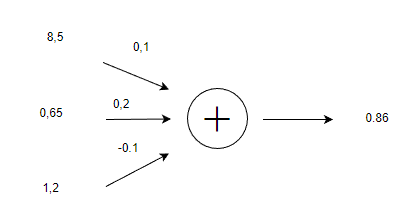

In [5]:
def w_sum(a, b):
    assert len(a) == len(b)
    output = 0

    for i in range(len(a)):
        output += a[i] * b[i]

    return output


weights = [0.1, 0.2, -0.1]


def neural_network(input, weights):
    pred = w_sum(input, weights)
    return pred


games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах

win_or_lose_binary = [1, 1, 0, 1]  # целевые значения выхода сети

target = win_or_lose_binary[0]
input = [games[0], wins[0], nfans[0]]

pred = neural_network(input, weights)
error = (pred - target) ** 2

learning_rate = 0.01


def ele_mul(number, vector):
    output = [0, 0, 0]
    for i in range(len(vector)):
        output[i] = number * vector[i]
    return output


weight_corrections = ele_mul(2.0 * (pred - target), input)

print(f"Old weights: {weights}")
for i in range(len(weights)):
    weights[i] = weights[i] - learning_rate * weight_corrections[i]

print("Weights:" + str(weights))
print("Weight corrections:" + str(weight_corrections))

Old weights: [0.1, 0.2, -0.1]
Weights:[0.1238, 0.20182, -0.09664]
Weight corrections:[-2.379999999999998, -0.18199999999999988, -0.33599999999999974]


2. Сделайте  несколько итераций градиентного спуска.Постройте графики error/weight. Отметьте на графиках как меняется соответсвующий вес в процессе обучения.

In [107]:
weights = np.array([0.1, 0.2, -0.1])

games = [8.5, 9.5, 9.9, 9.0]  # среднее число игр, сыгранных каждым игроком в сезоне
wins = [0.65, 0.8, 0.8, 0.9]  # доля побед
nfans = [1.2, 1.3, 0.5, 1.0]  # число фанатов в тысячах

win_or_lose_binary = [1, 1, 0, 1]  # целевые значения выхода сети

target = win_or_lose_binary[0]
input = np.array([games[0], wins[0], nfans[0]])

learning_rate = 0.001
iterations = 10
losses = np.zeros((iterations,))
w_values = np.zeros((iterations, len(weights)))
gradients = np.zeros((iterations, len(weights)))

for i in range(iterations):
    pred = input @ weights
    error = (pred - target) ** 2
    grads = 2.0 * (pred - target) * input
    losses[i] = error
    w_values[i] = weights
    gradients[i] = grads
    weights = weights - learning_rate * grads

print(f"Old weights: {w_values[0]}")
print(f"New weights: {w_values[-1]}")

Old weights: [ 0.1  0.2 -0.1]
New weights: [ 0.11226719  0.20093808 -0.09826816]


In [108]:
print(f"Losses = \n{losses}")
print(f"Weights = \n{w_values}")
print(f"Grads = \n{gradients}")

Losses = 
[0.0196     0.0142202  0.01031705 0.00748523 0.00543069 0.00394008
 0.00285861 0.00207398 0.00150472 0.0010917 ]
Weights = 
[[ 0.1         0.2        -0.1       ]
 [ 0.10238     0.200182   -0.099664  ]
 [ 0.10440722  0.20033702 -0.0993778 ]
 [ 0.10613396  0.20046907 -0.09913403]
 [ 0.10760476  0.20058154 -0.09892639]
 [ 0.10885754  0.20067734 -0.09874952]
 [ 0.10992463  0.20075894 -0.09859888]
 [ 0.11083355  0.20082845 -0.09847056]
 [ 0.11160775  0.20088765 -0.09836126]
 [ 0.11226719  0.20093808 -0.09826816]]
Grads = 
[[-2.38       -0.182      -0.336     ]
 [-2.0272245  -0.15502305 -0.2861964 ]
 [-1.72673915 -0.13204476 -0.24377494]
 [-1.47079324 -0.11247242 -0.2076414 ]
 [-1.25278491 -0.0958012  -0.17686375]
 [-1.06709087 -0.08160107 -0.15064812]
 [-0.90892132 -0.06950575 -0.1283183 ]
 [-0.77419646 -0.05920326 -0.10929832]
 [-0.65944119 -0.05042786 -0.09309758]
 [-0.56169552 -0.04295319 -0.07929819]]


In [111]:
def draw_tangents(w_ind, losses, w_values, grads, ax):  # y = kx + b
    weigths = w_values[:, w_ind]
    k_coeffs = grads[:, w_ind]
    b_coeffs = losses - k_coeffs * weigths  # b = y - kx
    df = 0.0
    label = "tangents"
    for i in range(len(losses)):
        if i == 0:
            df = 0.3 * (weigths[i] - weigths[i + 1])
        else:
            df = 0.3 * (weigths[i] - weigths[i - 1])
            label = ""
        w = weigths[i]
        x = np.array([w - df, w + df])
        y = k_coeffs[i] * x + b_coeffs[i]
        ax.plot(x, y, color="black", linestyle="--", zorder=3, label=label)
    return

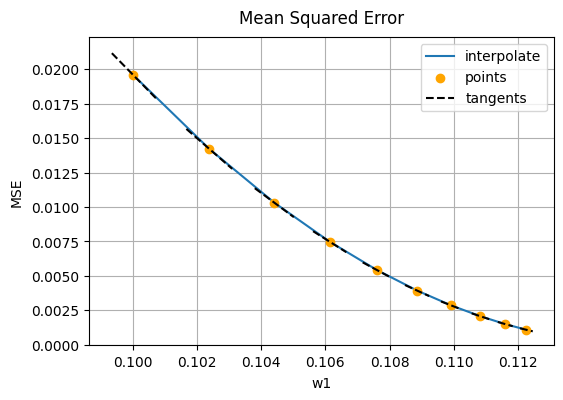

In [118]:
w_ind = 0  # for first weight
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Mean Squared Error", fontsize=12, pad=10)
ax.set_xlabel(f"w{w_ind + 1}", fontsize=10, labelpad=5)
ax.set_ylabel(f"MSE", fontsize=10, labelpad=5)
ax.plot(w_values[:, w_ind], losses, label="interpolate")
ax.scatter(
    w_values[:, w_ind], losses, marker="o", color="orange", zorder=2, label="points"
)
draw_tangents(w_ind, losses, w_values, gradients, ax)
ax.grid(visible=True)
ax.legend(loc="upper right")
plt.show()

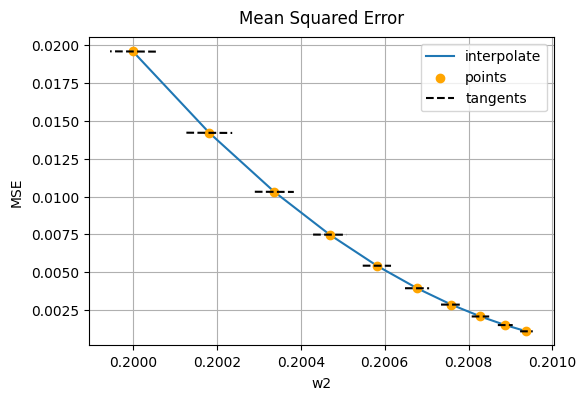

In [119]:
w_ind = 1  # for second weight
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Mean Squared Error", fontsize=12, pad=10)
ax.set_xlabel(f"w{w_ind + 1}", fontsize=10, labelpad=5)
ax.set_ylabel(f"MSE", fontsize=10, labelpad=5)
ax.plot(w_values[:, w_ind], losses, label="interpolate")
ax.scatter(
    w_values[:, w_ind], losses, marker="o", color="orange", zorder=2, label="points"
)
draw_tangents(w_ind, losses, w_values, gradients, ax)
ax.grid(visible=True)
ax.legend(loc="upper right")
plt.show()

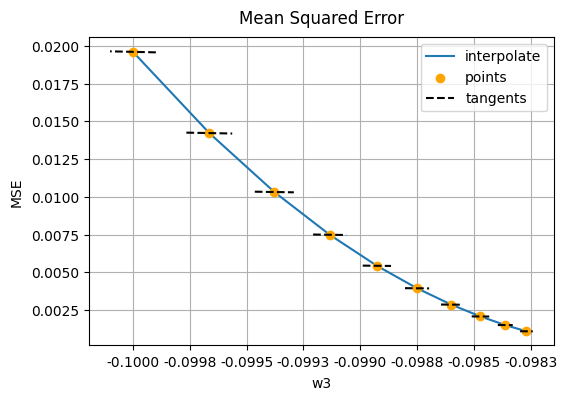

In [122]:
w_ind = 2  # for third weight
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.set_title(f"Mean Squared Error", fontsize=12, pad=10)
ax.set_xlabel(f"w{w_ind + 1}", fontsize=10, labelpad=5)
ax.set_ylabel(f"MSE", fontsize=10, labelpad=5)
ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%.4f"))
ax.plot(w_values[:, w_ind], losses, label="interpolate")
ax.scatter(
    w_values[:, w_ind], losses, marker="o", color="orange", zorder=2, label="points"
)
draw_tangents(w_ind, losses, w_values, gradients, ax)
ax.grid(visible=True)
ax.legend(loc="upper right")
plt.show()

**Касательные для первого веса имеют бОльший наклон, чем для остальных весов. Это означает, что именно корректировкой первого веса и достигается в основном минимум функции потерь.**